<a href="https://colab.research.google.com/github/eirenwibi/2025_Visi-Komputer/blob/main/Eiren_Wibi_Hidayat_4_33_24_1_08_Jobsheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


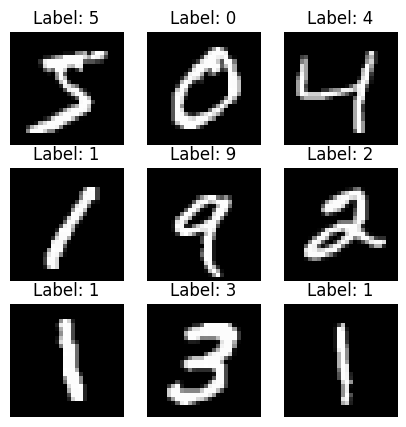

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

###Tugas Kecil : mengganti range yang mulanya (9) menjadi (25).

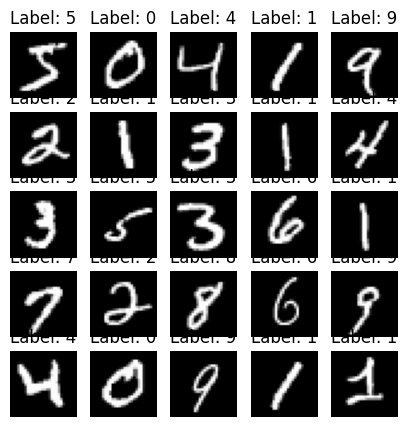

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

#Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma ='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) #gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


###Tugas Kecil : Ubah kernel dari linear menjadi rbf

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma ='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) #gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


#Praktikum D3 - Membangun CNN Sederhana

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.8927 - loss: 0.3676 - val_accuracy: 0.9813 - val_loss: 0.0671
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9802 - loss: 0.0661 - val_accuracy: 0.9825 - val_loss: 0.0637
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.9865 - loss: 0.0427 - val_accuracy: 0.9842 - val_loss: 0.0596
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9906 - loss: 0.0306 - val_accuracy: 0.9855 - val_loss: 0.0560
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9937 - loss: 0.0216 - val_accuracy: 0.9843 - val_loss: 0.0635


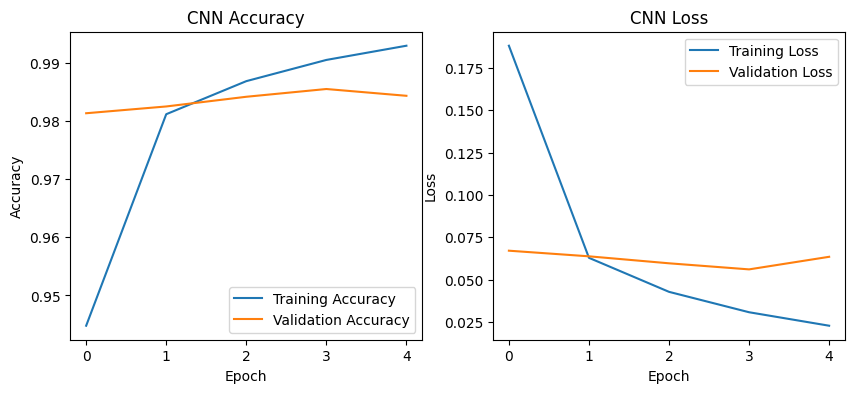

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Tugas Kecil : Tambahkan satu lapisan Conv2D lagi sebelum Flatten

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9075 - loss: 0.3128 - val_accuracy: 0.9867 - val_loss: 0.0472
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9853 - loss: 0.0472 - val_accuracy: 0.9878 - val_loss: 0.0379
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9902 - loss: 0.0308 - val_accuracy: 0.9877 - val_loss: 0.0406
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9921 - loss: 0.0238 - val_accuracy: 0.9922 - val_loss: 0.0294
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9946 - loss: 0.0160 - val_accuracy: 0.9912 - val_loss: 0.0291


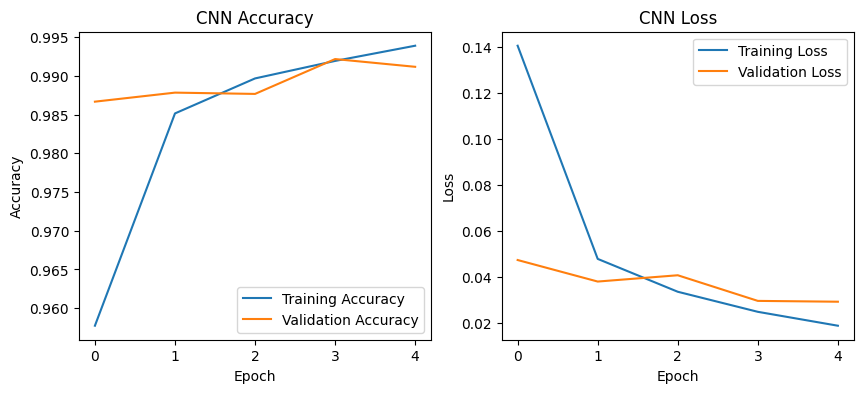

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Praktikum D4 - Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step - accuracy: 0.3642 - loss: 1.7421 - val_accuracy: 0.5730 - val_loss: 1.2213
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.5930 - loss: 1.1695 - val_accuracy: 0.6154 - val_loss: 1.1053
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.6411 - loss: 1.0273 - val_accuracy: 0.6672 - val_loss: 0.9862
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.6743 - loss: 0.9355 - val_accuracy: 0.6666 - val_loss: 0.9706
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.6946 - loss: 0.8728 - val_accuracy: 0.6594 - val_loss: 0.9826
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.7161 - loss: 0.8172 - val_accuracy: 0.6820 - val_loss: 0.9196
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7343 - loss: 0.7656 - val_accuracy: 0.6814 - val_loss: 0.9327
Epoch 8/10
1407/1407 ━

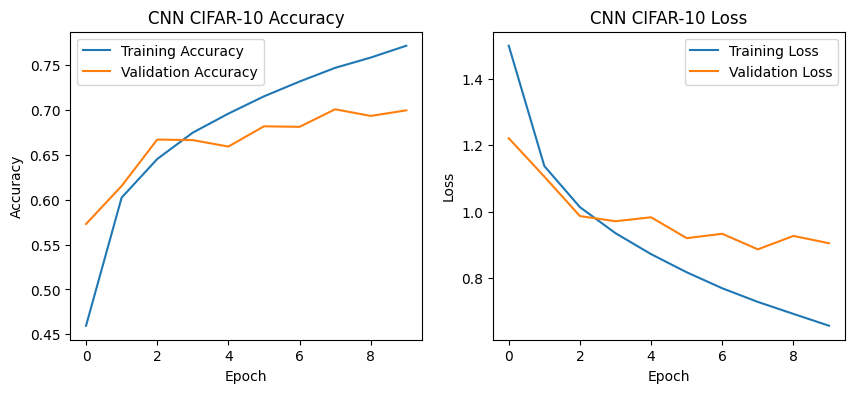

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential ([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Tugas Kecil : Tambahkan Dropout(0.5) sebelum lapisan Dense terakhir

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 60ms/step - accuracy: 0.2605 - loss: 1.9753 - val_accuracy: 0.5068 - val_loss: 1.3833
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 149s 64ms/step - accuracy: 0.4417 - loss: 1.5298 - val_accuracy: 0.5586 - val_loss: 1.2541
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 130s 56ms/step - accuracy: 0.4970 - loss: 1.3849 - val_accuracy: 0.5832 - val_loss: 1.1642
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.5335 - loss: 1.2906 - val_accuracy: 0.6366 - val_loss: 1.0524
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 42ms/step - accuracy: 0.5566 - loss: 1.2265 - val_accuracy: 0.6418 - val_loss: 1.0445
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.5797 - loss: 1.1701 - val_accuracy: 0.6400 - val_loss: 1.0448
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.5970 - loss: 1.1276 - val_accuracy: 0.6552 - val_loss: 0.9880
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.6103

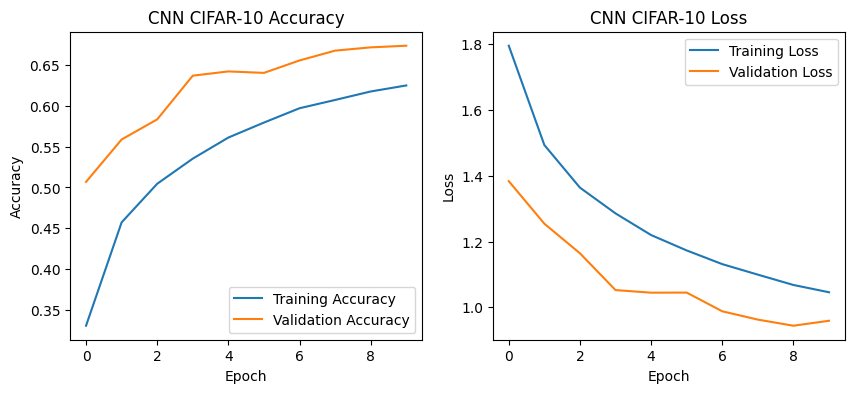

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential ([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Praktikum D5 - Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 630s 446ms/step - accuracy: 0.4526 - loss: 1.5661 - val_accuracy: 0.5740 - val_loss: 1.2137
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 636s 452ms/step - accuracy: 0.5796 - loss: 1.2016 - val_accuracy: 0.5990 - val_loss: 1.1600
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 679s 450ms/step - accuracy: 0.6039 - loss: 1.1358 - val_accuracy: 0.5950 - val_loss: 1.1498
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 613s 435ms/step - accuracy: 0.6148 - loss: 1.0997 - val_accuracy: 0.6016 - val_loss: 1.1367
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 633s 450ms/step - accuracy: 0.6299 - loss: 1.0544 - val_accuracy: 0.6106 - val_loss: 1.1111


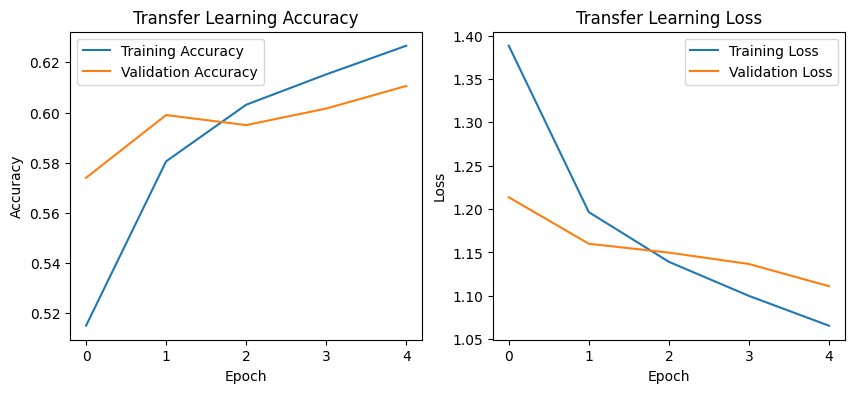

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Tugas Kecil : Aktifkan 1 - 2 lapisan terakhir dari base_model (fine-tunning)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 715s 507ms/step - accuracy: 0.5079 - loss: 1.4059 - val_accuracy: 0.6028 - val_loss: 1.1033
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 836s 574ms/step - accuracy: 0.6306 - loss: 1.0547 - val_accuracy: 0.6352 - val_loss: 1.0467
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 746s 492ms/step - accuracy: 0.6559 - loss: 0.9723 - val_accuracy: 0.6454 - val_loss: 1.0286
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 756s 502ms/step - accuracy: 0.6763 - loss: 0.9179 - val_accuracy: 0.6518 - val_loss: 1.0167
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 740s 501ms/step - accuracy: 0.6886 - loss: 0.8771 - val_accuracy: 0.6646 - val_loss: 0.9753


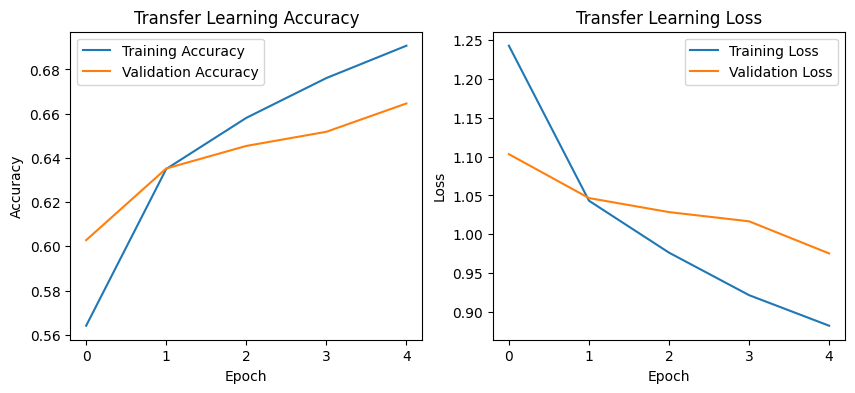

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))

for layer in base_model.layers:
  layer.trainable = False

for layer in base_model.layers[-2:]:
  layer.trainable = True

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Praktikum D6 - Evaluasi dengan Confusion Matrix dan Metrik lain:

313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 389ms/step
              precision    recall  f1-score   support

           0       0.79      0.62      0.70      1000
           1       0.74      0.80      0.77      1000
           2       0.60      0.60      0.60      1000
           3       0.50      0.41      0.45      1000
           4       0.62      0.57      0.60      1000
           5       0.55      0.59      0.57      1000
           6       0.65      0.75      0.69      1000
           7       0.61      0.81      0.69      1000
           8       0.74      0.80      0.77      1000
           9       0.82      0.61      0.70      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



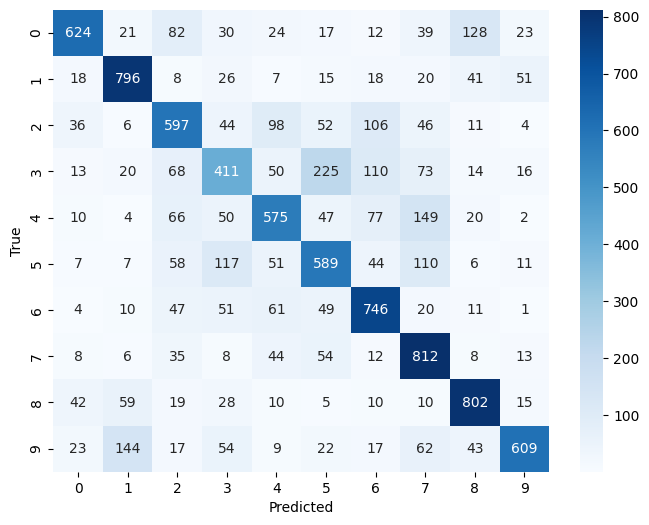

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#PENUGASAN

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.8970 - loss: 0.3513 - val_accuracy: 0.9800 - val_loss: 0.0701
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9810 - loss: 0.0624 - val_accuracy: 0.9852 - val_loss: 0.0544
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9887 - loss: 0.0374 - val_accuracy: 0.9855 - val_loss: 0.0553
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9918 - loss: 0.0247 - val_accuracy: 0.9862 - val_loss: 0.0480
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9941 - loss: 0.0198 - val_accuracy: 0.9872 - val_loss: 0.0467


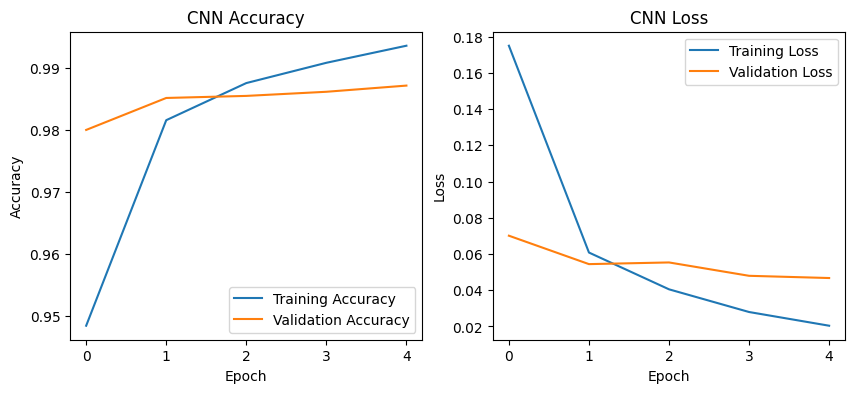

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w) // 2, (28 - h) // 2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim (28,28,1)
    arr = arr[..., None]

    return canvas, arr


Saving angka_2.jpg to angka_2 (1).jpg
Saving angka_4.jpg to angka_4.jpg
Saving angka_5.jpg to angka_5.jpg
Saving angka_7.jpg to angka_7.jpg
Saving angka_8.jpg to angka_8.jpg


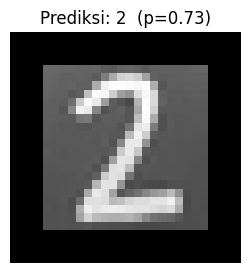

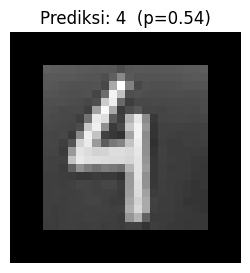

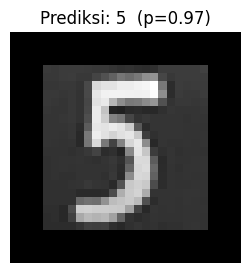

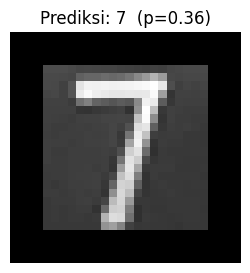

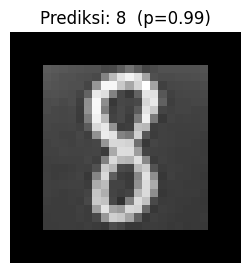

Rekap Prediksi (CNN):
- angka_2 (1).jpg -> 2 (p=0.727)
- angka_4.jpg -> 4 (p=0.539)
- angka_5.jpg -> 5 (p=0.966)
- angka_7.jpg -> 7 (p=0.362)
- angka_8.jpg -> 8 (p=0.994)


In [ ]:
import matplotlib.pyplot as plt

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)

    # disp: PIL untuk ditampilkan, x: (28,28,1)
    disp, x = preprocess_to_mnist_28x28(img_pil)

    # (1,28,28,1)
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi model -> shape (10,)
    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3, 3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred}  (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")
